In [95]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from MyDecisionTree import DecisionTree
from MyDBSCAN import DBSCAN


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [24]:
DSLP = 'Days Since Last Purchase'
IP = 'Items Purchased'
AR = 'Average Rating'
TS = 'Total Spend'
AGE = 'Age'
ID = 'Customer ID'
GE = 'Gender'
CITY = 'City'
MEMB = 'Membership Type'
DISC = 'Discount Applied'
SAT = 'Satisfaction Level'

In [23]:
train.columns
#test.describe()

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [11]:
print("There are " + str(len(pd.unique(train['Customer ID']))) + ' unique entries and ' + str(len(train)) + ' total entries')

There are 280 unique entries and 280 total entries


Text(0.5, 1.0, 'Total Spend vs. Items Purchased')

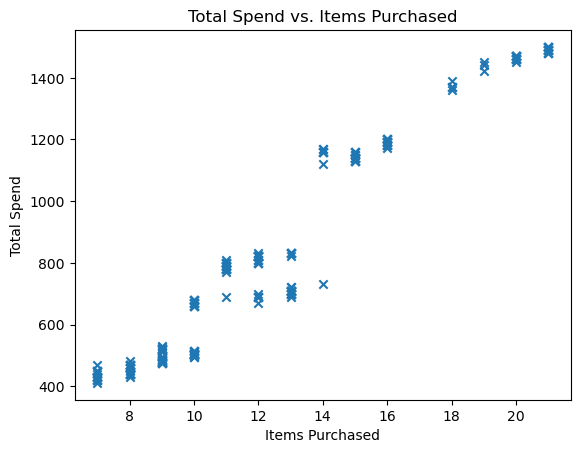

In [115]:
plt.scatter(train[IP], train[TS], marker = 'x')
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP)

Average Spend in Los Angeles: 805.4648936170213 +/- 17.71687473908976
Average Spend in New York: 1165.8500000000001 +/- 23.765939731143572
Average Spend in Miami: 691.5044444444445 +/- 19.03538174097624
Average Spend in Chicago: 500.19716981132086 +/- 15.416563057904112
Average Spend in Houston: 446.7673913043477 +/- 17.760398721873454
Average Spend in San Francisco: 1463.0953488372093 +/- 37.38728146811405


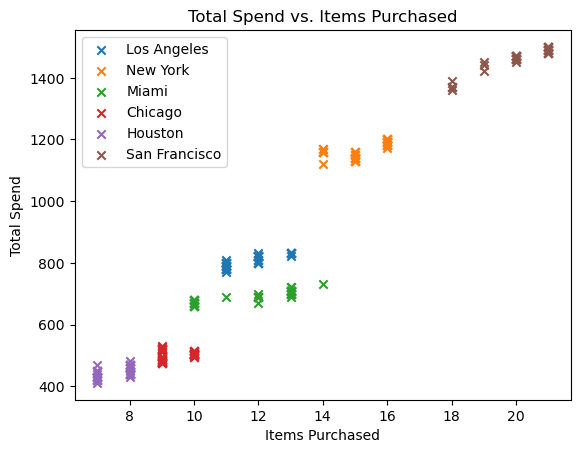

In [122]:
for c in pd.unique(train[CITY]):
    subtrain = train[train[CITY] == c]

    plt.scatter(subtrain[IP], subtrain[TS], marker = 'x', label = c)
    print('Average Spend in ' + c + ': ' + str(np.mean(subtrain[TS])) + ' +/- ' + str(np.std(subtrain[TS])))
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP)
plt.legend()

(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 26.,  0.,  0.,  0.,  0.

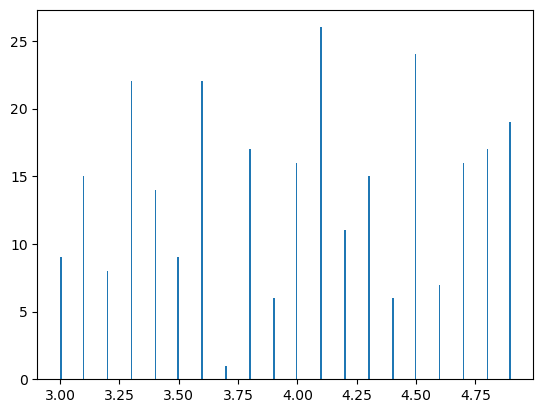

In [58]:
plt.hist(train[AR], bins = 300)

Text(0.5, 1.0, 'Total Spend vs. Items Purchased')

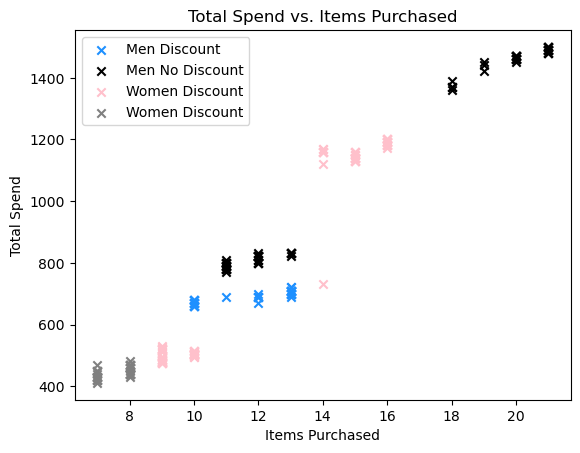

In [126]:
plt.scatter(train.loc[(train[GE] == 'Male') & (train[DISC] == True), IP], \
            train.loc[(train[GE] == 'Male') & (train[DISC] == True), TS], color = 'dodgerblue', marker = 'x', label = 'Men Discount')
plt.scatter(train.loc[(train[GE] == 'Male') & (train[DISC] == False), IP], \
         train.loc[(train[GE] == 'Male') & (train[DISC] == False), TS], color = 'k', marker = 'x', label = 'Men No Discount')
plt.scatter(train.loc[(train[GE] == 'Female') & (train[DISC] == True), IP], \
         train.loc[(train[GE] == 'Female') & (train[DISC] == True), TS], color = 'pink', marker = 'x', label = 'Women Discount')
plt.scatter(train.loc[(train[GE] == 'Female') & (train[DISC] == False), IP], \
         train.loc[(train[GE] == 'Female') & (train[DISC] == False), TS], color = 'gray', marker = 'x', label = 'Women Discount')

plt.legend()
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP)

98
84
96
0.6546762589928058


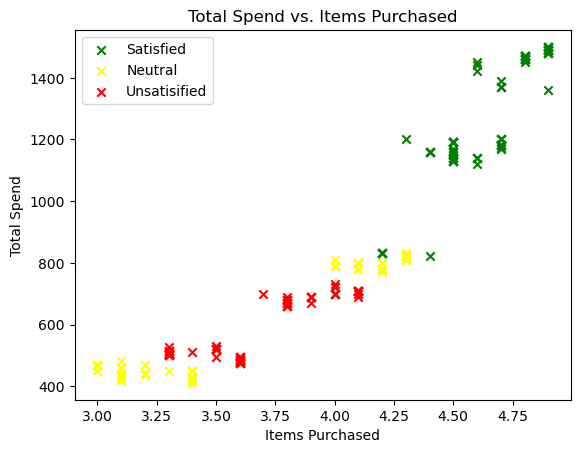

In [140]:
plt.scatter(train.loc[train[SAT] == 'Satisfied', AR], train.loc[train[SAT] == 'Satisfied', TS], marker = 'x', c='g', label='Satisfied')
plt.scatter(train.loc[train[SAT] == 'Neutral', AR], train.loc[train[SAT] == 'Neutral', TS], marker = 'x', c='yellow', label = 'Neutral')
plt.scatter(train.loc[train[SAT] == 'Unsatisfied', AR], train.loc[train[SAT] == 'Unsatisfied', TS], marker = 'x', c='r', label = 'Unsatisified')
plt.legend()
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP)

print(len(train[train[SAT] == 'Unsatisfied']))
print(len(train[train[SAT] == 'Neutral']))
print(len(train[train[SAT] == 'Satisfied']))

print((98 + 84)/(98+84+96))

Text(0.5, 1.0, 'Total Spend vs. Items Purchased')

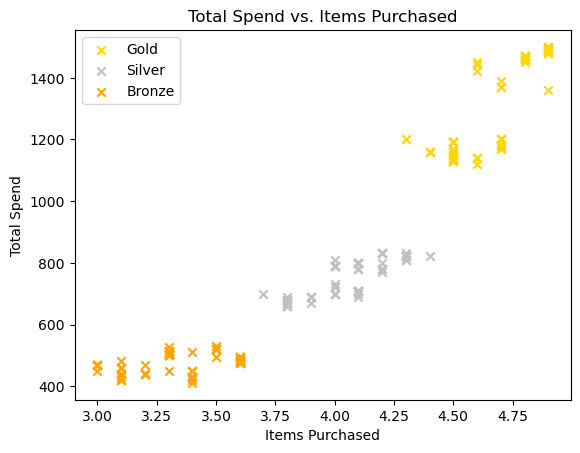

In [137]:
plt.scatter(train.loc[train[MEMB] == 'Gold', AR], train.loc[train[MEMB] == 'Gold', TS], marker = 'x', c='gold', label = 'Gold')
plt.scatter(train.loc[train[MEMB] == 'Silver', AR], train.loc[train[MEMB] == 'Silver', TS], marker = 'x', c='silver', label = 'Silver')
plt.scatter(train.loc[train[MEMB] == 'Bronze', AR], train.loc[train[MEMB] == 'Bronze', TS], marker = 'x', c='orange', label = 'Bronze')

plt.legend()
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP)

Text(0.5, 1.0, 'Total Spend vs. Items Purchased Colored by Satisfaction Rating')

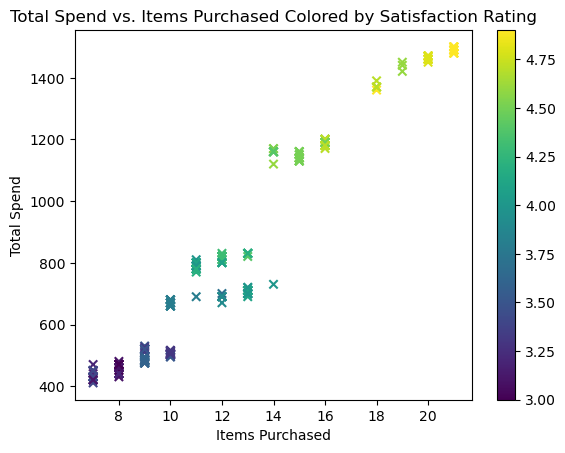

In [141]:
plt.scatter(train[IP], train[TS], marker='x', c=train[AR])
plt.colorbar()
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP + ' Colored by Satisfaction Rating')

Text(0.5, 1.0, 'Total Spend vs. Items Purchased Colored by\nDays Since Last Purchase')

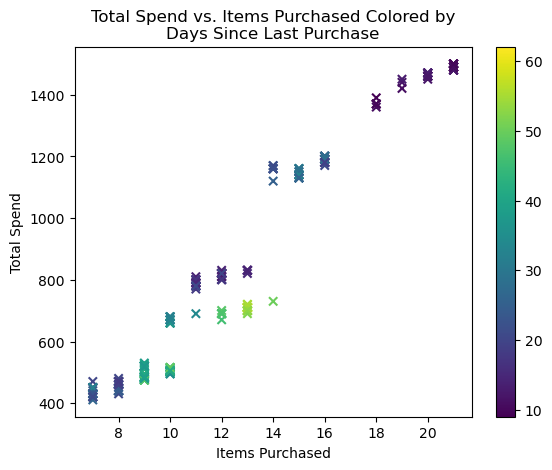

In [142]:
plt.scatter(train[IP], train[TS], marker='x', c=train[DSLP])
plt.colorbar()
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP + ' Colored by\nDays Since Last Purchase')

In [153]:
dt = DecisionTree()
dt.fit(train, TS, [GE, CITY, AGE, MEMB, IP, DISC, AR, DSLP, SAT], n2fit = 25)

Adding Node City with SSE 144252.16591777472
Adding Node Items Purchased with SSE 134091.09792512486
Adding Node Items Purchased with SSE 114633.00946358638
Adding Node Average Rating with SSE 103265.95612628479
Adding Node Age with SSE 94078.43032647291
Adding Node Age with SSE 86272.17202046877
Adding Node Items Purchased with SSE 61798.41312847921
Adding Node Age with SSE 61672.34792911717
Adding Node Age with SSE 60687.753259275894
Adding Node Age with SSE 58432.030179460955
Adding Node Days Since Last Purchase with SSE 57871.53567396646
Adding Node Items Purchased with SSE 55943.66817396644
Adding Node Gender with SSE 55439.85865015692
Adding Node Items Purchased with SSE 55320.32401812229
Adding Node Items Purchased with SSE 53875.09524246247
Adding Node Average Rating with SSE 52704.10593843316
Adding Node Age with SSE 52157.14760192523
Adding Node Items Purchased with SSE 26989.529907807602
Adding Node Days Since Last Purchase with SSE 26639.44443772213
Adding Node Average Rati

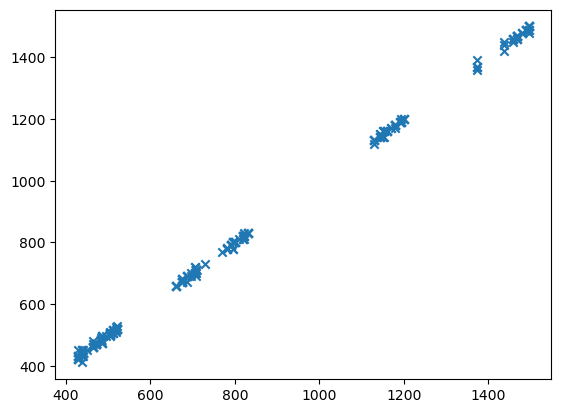

In [154]:
preds = dt.predict(train[[GE, CITY, AGE, MEMB, IP, DISC, AR, DSLP, SAT]])

plt.scatter(preds, train[TS], marker='x')

Text(0.5, 1.0, 'Total Spend vs. Items Purchased in Test Set')

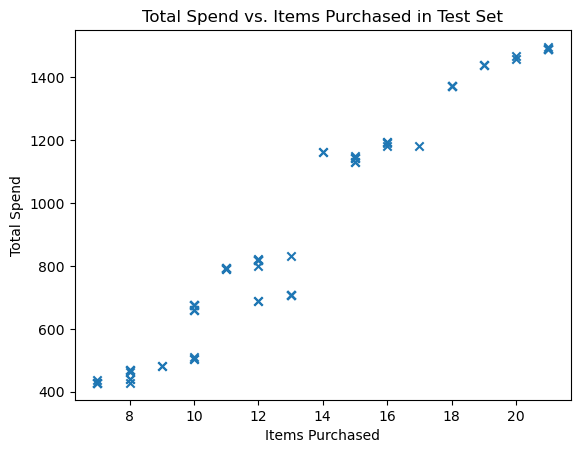

In [158]:
preds2 = dt.predict(test[[GE, CITY, AGE, MEMB, IP, DISC, AR, DSLP, SAT]])

testtowrite1 = pd.DataFrame({
    'Customer ID': test[ID],
    'Total Spend - Prediction': preds2
})

testtowrite1.to_csv('Problem1Predictions.csv')

plt.scatter(test[IP], preds2, marker='x')
plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP + ' in Test Set')

In [220]:
dbs = DBSCAN(1.0, 5)


In [221]:
dbs.fit(train[[GE, CITY, AGE, MEMB, IP, AR, DSLP, SAT]])

train2 = train
train2['clusterid'] = dbs.clusters

dbs.register_ranges(train, TS)

In [222]:
preds3 = dbs.predict(test[[GE, CITY, AGE, MEMB, IP, AR, DSLP, SAT]])

rlist = np.array(list(map(lambda x: dbs.ranges[x], preds3)))

print(rlist)
towrite2 = testtowrite1 = pd.DataFrame({
    'Customer ID': test[ID],
    'Total Spend - Prediction Minimum': rlist[:, 0],
    'Total Spend - Prediction Maximum': rlist[:, 1]
})

towrite2.to_csv('Problem2Predictions.csv')

[[ 770.2   830.9 ]
 [1120.2  1200.8 ]
 [ 660.3   720.4 ]
 [ 770.2   830.9 ]
 [ 475.25  530.4 ]
 [ 475.25  530.4 ]
 [ 475.25  530.4 ]
 [ 820.75  830.75]
 [1120.2  1200.8 ]
 [ 475.25  530.4 ]
 [1120.2  1200.8 ]
 [ 660.3   720.4 ]
 [ 820.75  830.75]
 [ 820.75  830.75]
 [ 475.25  530.4 ]
 [1120.2  1200.8 ]
 [ 770.2   830.9 ]
 [ 475.25  530.4 ]
 [ 475.25  530.4 ]
 [ 770.2   830.9 ]
 [ 820.75  830.75]
 [1120.2  1200.8 ]
 [ 475.25  530.4 ]
 [1120.2  1200.8 ]
 [ 660.3   720.4 ]
 [ 770.2   830.9 ]
 [ 475.25  530.4 ]
 [1120.2  1200.8 ]
 [1120.2  1200.8 ]
 [1120.2  1200.8 ]
 [ 770.2   830.9 ]
 [1120.2  1200.8 ]
 [ 660.3   720.4 ]
 [ 475.25  530.4 ]
 [ 770.2   830.9 ]
 [ 770.2   830.9 ]
 [ 820.75  830.75]
 [ 820.75  830.75]
 [ 475.25  530.4 ]
 [ 770.2   830.9 ]
 [ 475.25  530.4 ]
 [1120.2  1200.8 ]
 [ 475.25  530.4 ]
 [ 475.25  530.4 ]
 [ 770.2   830.9 ]
 [ 475.25  530.4 ]
 [1120.2  1200.8 ]
 [ 770.2   830.9 ]
 [ 770.2   830.9 ]
 [ 820.75  830.75]
 [1120.2  1200.8 ]
 [1120.2  1200.8 ]
 [ 820.75  8

0      1.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
275   -1.0
276    3.0
277    1.0
278    1.0
279    2.0
Name: clusterid, Length: 280, dtype: float64


Text(0.5, 1.0, 'Total Spend vs. Items Purchased in Training Set\nColored by Cluster ID')

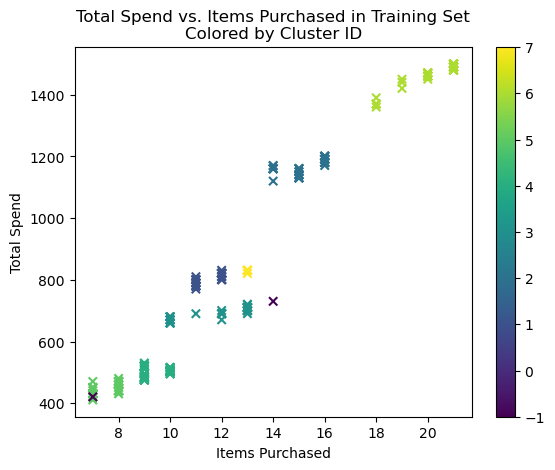

In [224]:
plt.scatter(train2[IP], train2[TS], marker='x', c=train2['clusterid'])
plt.colorbar()
print(train2['clusterid'])

plt.xlabel(IP)
plt.ylabel(TS)
plt.title(TS + ' vs. ' + IP + ' in Training Set\nColored by Cluster ID')

Text(0.5, 1.0, 'Comparison of Training and Test Set')

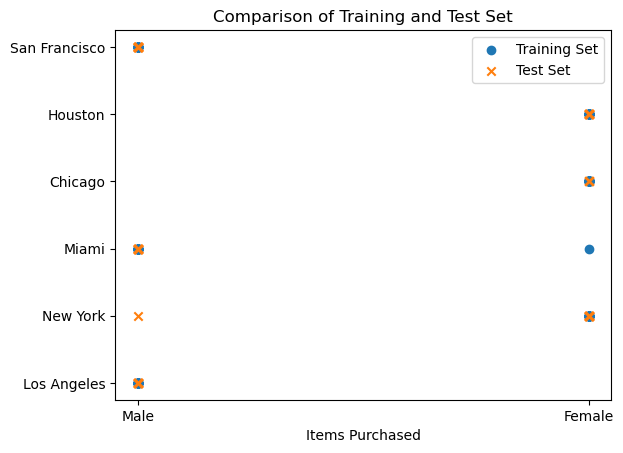

In [196]:
plt.scatter(train[GE], train[CITY], label = 'Training Set')
plt.scatter(test[GE], test[CITY], marker = 'x', label = 'Test Set')

plt.legend()
plt.xlabel('Items Purchased')
plt.title("Comparison of Training and Test Set")